In [1]:
import sys
sys.path.append("../")
from sir.discretemodel import *
import numpy as np 
from numpy.random import randint, rand
import matplotlib.pyplot as plt


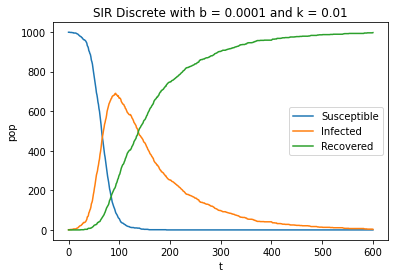

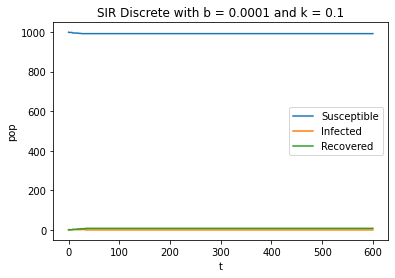

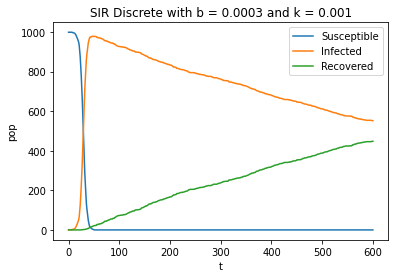

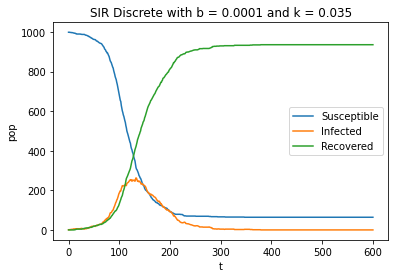

In [2]:
# Nice graph, everyone gets sick: b = 0.0001, k = 0.01
b = 0.0001
k = 0.01
counts_sus, counts_inf, counts_rec = run_simulation(b, k, T=600, N=1000)
plt.plot(counts_sus, label='Susceptible')
plt.plot(counts_inf, label='Infected')
plt.plot(counts_rec, label='Recovered')
plt.xlabel('t')
plt.ylabel('pop')
plt.title('SIR Discrete with b = {} and k = {}'.format(b, k))
plt.legend()
plt.show()

# No one gets sick: b = 0.0001 and k = 0.1
b = 0.0001
k = 0.1
counts_sus, counts_inf, counts_rec = run_simulation(b, k, T=600, N=1000)
plt.plot(counts_sus, label='Susceptible')
plt.plot(counts_inf, label='Infected')
plt.plot(counts_rec, label='Recovered')
plt.xlabel('t')
plt.ylabel('pop')
plt.title('SIR Discrete with b = {} and k = {}'.format(b, k))
plt.legend()
plt.show()

# Slow recovery: b = 0.0003 and k = 0.001
b = 0.0003
k = 0.001
counts_sus, counts_inf, counts_rec = run_simulation(b, k, T=600, N=1000)
plt.plot(counts_sus, label='Susceptible')
plt.plot(counts_inf, label='Infected')
plt.plot(counts_rec, label='Recovered')
plt.xlabel('t')
plt.ylabel('pop')
plt.title('SIR Discrete with b = {} and k = {}'.format(b, k))
plt.legend()
plt.show()

# Not everyone gets sick: b = 0.0001 and k = 0.035
b = 0.0001
k = 0.035
counts_sus, counts_inf, counts_rec = run_simulation(b, k, T=600, N=1000)
plt.plot(counts_sus, label='Susceptible')
plt.plot(counts_inf, label='Infected')
plt.plot(counts_rec, label='Recovered')
plt.xlabel('t')
plt.ylabel('pop')
plt.title('SIR Discrete with b = {} and k = {}'.format(b, k))
plt.legend()
plt.show()

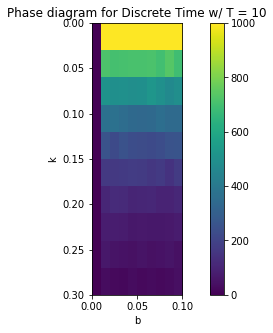

In [4]:
# Phase Diagram Code
bs = np.linspace(0, 0.1, 10)
ks = np.linspace(0, 0.3, 10)

cts = np.zeros((len(bs), len(ks))) # create matrix of zeros
for i, k in enumerate(ks): 
    for j, b in enumerate(bs):
        cts[i,j] = run_simulation_phase(b, k, T=10) # assign counts of infected to each element
plt.figure(figsize=(10,5))
plt.imshow(cts, extent=[np.min(bs), np.max(bs), np.max(ks), np.min(ks)])
plt.colorbar()
plt.xlabel('b')
plt.ylabel('k')
plt.title('Phase diagram for Discrete Time w/ T = 10')
plt.show()